<a href="https://colab.research.google.com/github/ANANTH-2002/Wine-quality-dataset/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,median_absolute_error as mee,classification_report as cr,accuracy_score as ac,r2_score as r2,mean_squared_error as mse

# Classification

In [ ]:
from sklearn import datasets 
wine = datasets.load_wine()

In [ ]:
x=wine.data
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
y=wine.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
print(x.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

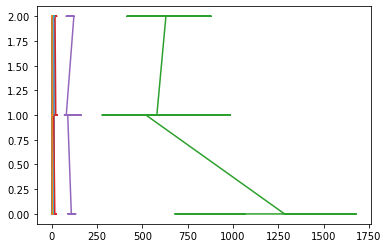

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
print(st_x)

StandardScaler()


In [ ]:
x_train= st_x.fit_transform(x_train) 
print(x_train)

[[-0.68292372 -0.76156377 -0.82845262 ...  0.840177    0.01285049
   0.55061775]
 [-1.25935384 -0.77050704  0.04619624 ...  0.37248047  0.0418151
  -0.95997137]
 [ 0.58031674 -0.50220886  0.8015748  ...  0.67010553  1.73624438
   0.26524979]
 ...
 [ 0.73975486 -0.50220886  1.1593857  ...  1.3503914   0.37490803
   1.70759874]
 [-1.17350254 -0.18919431 -0.94772292 ... -0.435359    0.95420009
  -1.18330282]
 [ 1.02183768 -0.91359941 -0.55015525 ...  0.202409    1.34522224
   0.88561493]]


In [ ]:
x_test= st_x.transform(x_test)  
print(x_test)

[[-1.00179996e+00 -1.05669177e+00 -2.61750710e+00 -9.28867547e-01
   3.78999312e+00 -7.21842134e-01 -7.74142653e-01 -1.87120991e+00
   1.75545785e+00 -9.60877270e-01  1.35039140e+00  6.50071762e-01
  -1.28682079e-01]
 [-1.48011431e+00 -5.82698313e-01 -2.10066914e+00 -1.07918221e-01
  -9.79796420e-01  3.16755356e-01 -4.13656477e-01  1.03700057e-02
  -3.41901264e-01 -1.29625752e+00 -9.52160679e-02 -2.62313237e-01
  -1.06853527e+00]
 [ 1.26712709e+00 -6.63187769e-01 -5.10398487e-01 -1.17211179e+00
   1.95545868e+00  1.11567650e+00  1.11840977e+00 -1.05313169e+00
   9.78658179e-01  2.27812221e-01  5.42551934e-01  1.57693906e+00
   6.36311147e-02]
 [-1.48011431e+00 -8.06280135e-01 -1.66334471e+00  2.87353676e-01
  -9.79796420e-01 -5.14122636e-01 -4.53710496e-01 -5.62284751e-01
  -1.28281354e-01 -1.34295604e+00 -5.26982011e-02  1.02661160e+00
  -8.20389212e-01]
 [ 1.46335862e+00 -6.00584859e-01 -4.30884954e-01 -1.08089520e+00
   1.36840766e+00  1.43524496e+00  9.48180189e-01 -8.89516041e-01


In [ ]:
clf=svm.SVC(kernel='rbf',C=1,gamma=0.1)

In [ ]:
clf.fit(x_train,y_train)

SVC(C=1, gamma=0.1)

In [ ]:
y_pre=clf.predict(x_test)
y_pre

array([1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0, 2,
       0, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 0])

In [ ]:
ac(y_test,y_pre)*100

97.22222222222221

In [ ]:
from sklearn.metrics import confusion_matrix  
confusion_matrix(y_test, y_pre) 

array([[10,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  8]], dtype=int64)

In [ ]:
print(cr(y_test,y_pre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.94      0.97        18
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [ ]:
print(y_test)
print(y_pre)

[1 1 0 1 0 1 1 0 2 0 0 1 0 1 1 1 1 1 1 2 0 2 0 0 1 2 1 2 1 1 2 2 1 2 1 0]
[1 1 0 1 0 1 1 0 2 0 0 1 0 1 1 1 2 1 1 2 0 2 0 0 1 2 1 2 1 1 2 2 1 2 1 0]


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(clf, wine.data, wine.target, cv=10)*100

array([ 0.        ,  0.        ,  0.        , 26.9610164 ,  0.        ,
        0.        ,  0.        ,  1.38124059,  0.        ,  0.        ])

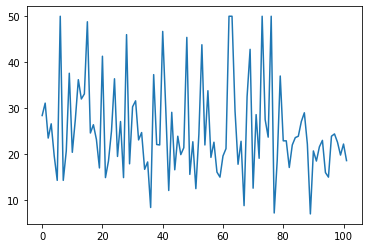

In [ ]:
plt.plot(y_test)

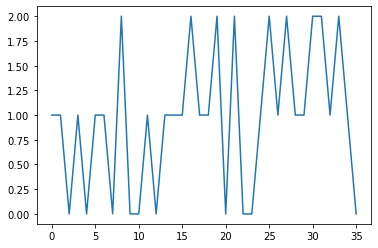

In [ ]:
plt.plot(y_pre)

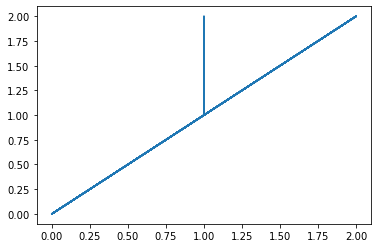

In [ ]:
plt.plot(y_test,y_pre)

# Regression

In [ ]:
from sklearn import datasets 
bos = datasets.load_boston()

In [ ]:
x=bos.data
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
y=bos.target
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
bos.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
print(x.shape)
print(y.shape)

(506, 13)
(506,)


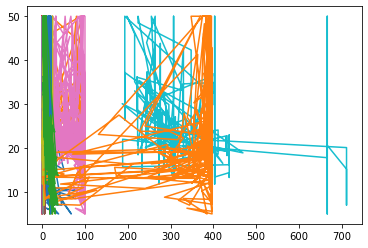

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
print(st_x)

StandardScaler()


In [ ]:
x_train= st_x.fit_transform(x_train) 
print(x_train)

[[-0.42054453  0.41117689 -0.84923313 ... -0.81846496  0.44047695
   0.05497058]
 [ 1.05813    -0.47409775  0.94239807 ...  0.77079638 -2.32930526
   0.03795721]
 [-0.25278198 -0.47409775 -0.48975657 ...  1.14474022 -1.10359222
   1.03182129]
 ...
 [-0.16849289 -0.47409775  0.94239807 ...  0.77079638  0.18010861
   0.03937499]
 [-0.41170669 -0.47409775  2.02801729 ...  0.25662359  0.3299541
   0.24778871]
 [-0.34647689  0.36902095 -1.08936348 ... -2.59469822  0.40734107
  -0.37036355]]


In [ ]:
x_test= st_x.transform(x_test)  
print(x_test)

[[-0.42428043  0.91704811 -1.3467487  ... -0.07057727  0.41740766
  -0.58586618]
 [-0.42790407  2.05525837 -1.23890573 ... -1.37938073  0.41751252
  -1.13880054]
 [-0.42636633  2.89837708 -1.17563785 ... -1.14566583  0.45452824
  -1.18984064]
 ...
 [-0.41621972 -0.47409775 -0.4293645  ...  1.09799724  0.43712142
  -0.11232751]
 [-0.41898478  0.79058031 -0.95132447 ... -0.91195092  0.20129041
  -0.26119446]
 [-0.40513088 -0.47409775 -0.4293645  ...  1.09799724 -2.96496891
  -0.3448435 ]]


In [ ]:
clf=svm.SVR(kernel='linear',C=1,gamma=0.1)

In [ ]:
clf.fit(x_train,y_train)

SVR(C=1, gamma=0.1, kernel='linear')

In [ ]:
y_pre=clf.predict(x_test)
y_pre

array([29.00959378, 31.59800528, 29.35158602, 24.11109203, 17.45496993,
       15.69691814, 32.58012324, 14.44010181, 23.73734498, 34.43294215,
       19.82735167, 28.7363666 , 25.61662081, 31.64908957, 32.413631  ,
       38.56140228, 24.88081081, 20.56583985, 24.0863253 , 21.29510112,
       29.06267848, 16.93216693, 22.871266  , 24.49183875, 31.71926277,
       20.43042109, 19.44014945, 16.37165564, 36.63381369,  0.45802575,
       31.91787668, 29.50557077, 26.33049708, 24.70887015, 19.1087368 ,
       18.77434439,  6.57329157, 33.70501478, 24.89698775, 25.27824042,
       34.22948342, 26.83657655, 17.26183249, 30.51012384, 18.12643902,
       27.1683306 , 18.10277652, 18.79937357, 35.9203414 , 16.19813284,
       21.79125283, 18.39209756, 22.48160282, 33.7647397 , 24.97534112,
       32.57574809, 19.58231008, 18.41750643, 17.40489351, 22.87053092,
       19.03773457, 21.91520858, 37.35914407, 40.79878811, 28.72950126,
       16.95163236, 23.84798003,  2.81791738, 27.53342656, 31.98

In [ ]:
clf.score(x_train,y_train)*100

71.12080992810867

In [ ]:
clf.score(x_test,y_test)*100

64.70593045467518

In [ ]:
mae(y_test,y_pre)*100

396.4104593959279

In [ ]:
mee(y_test,y_pre)*100

217.59763336126633

In [ ]:
mse(y_test,y_pre)*100

3691.080015960256

In [ ]:
r2(y_test,y_pre)*100

64.70593045467518

In [ ]:
print("Coeff",clf.coef_.sum())
print("Int",clf.intercept_)

Coeff -3.2453721819313106
Int [20.97131986]


In [ ]:
print(y_test)
print(y_pre)

[28.4 31.1 23.5 26.6 19.6 14.3 50.  14.3 20.7 37.6 20.4 27.5 36.2 32.
 33.1 48.8 24.6 26.4 23.2 17.  41.3 14.9 18.5 25.  36.4 19.5 27.1 14.9
 46.  17.9 30.3 31.6 23.1 24.7 16.7 18.3  8.4 37.3 22.1 22.  46.7 30.1
 12.1 29.1 16.6 23.9 19.9 21.4 45.4 15.6 22.7 12.5 24.3 43.8 22.  33.8
 19.3 22.6 16.1 15.  19.6 21.2 50.  50.  29.4 17.8 22.8  8.8 32.5 42.8
 12.6 28.6 19.1 50.  27.5 23.7 50.   7.2 18.7 37.  22.9 22.9 17.1 22.
 23.6 23.9 27.1 29.  22.2  7.  20.7 18.5 21.6 23.  16.  15.  23.9 24.4
 22.6 19.8 22.2 18.6]
[29.00959378 31.59800528 29.35158602 24.11109203 17.45496993 15.69691814
 32.58012324 14.44010181 23.73734498 34.43294215 19.82735167 28.7363666
 25.61662081 31.64908957 32.413631   38.56140228 24.88081081 20.56583985
 24.0863253  21.29510112 29.06267848 16.93216693 22.871266   24.49183875
 31.71926277 20.43042109 19.44014945 16.37165564 36.63381369  0.45802575
 31.91787668 29.50557077 26.33049708 24.70887015 19.1087368  18.77434439
  6.57329157 33.70501478 24.89698775 25.278240

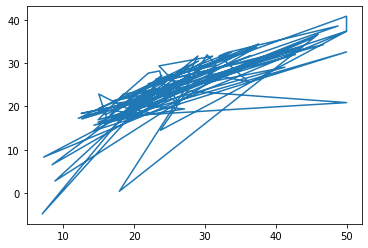

In [ ]:
plt.plot(y_test,y_pre)

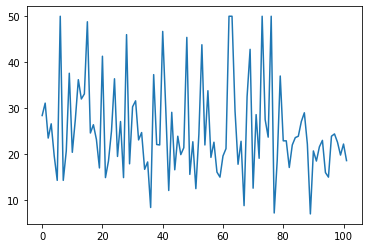

In [ ]:
plt.plot(y_test)

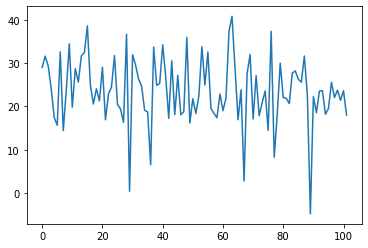

In [ ]:
plt.plot(y_pre)